In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv('sentiment_tweets3.csv')

In [120]:
df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [121]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [125]:
df['label (depression result)'].isnull().sum()

0

In [66]:
df = df.drop('Index', axis=1)

In [67]:
df

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [68]:
df['message to examine'][2344]

'@nooshin63 tnx dear '

In [69]:
df['label (depression result)'].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

In [70]:
for i in df['message to examine']:
    for j in i.split():
        if j.isdigit():
            res = 'yes'
        else:
            res = 'no'
print(res)

yes


# Text Preprocessing

In [71]:
#Removing Numbers and lowering the text

def remove_number(text):
    return ' '.join([i for i in str(text).split() if not i.isdigit()])

df['Lowered Text'] = df['message to examine'].apply(lambda x : remove_number(x))
df['Lowered Text'] = df['Lowered Text'].str.lower()

In [72]:
df

,message to examine,label (depression result),Lowered Text
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder
...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...
10310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...
10312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...


In [73]:
def remove_mention(text):
    return ' '.join([i for i in str(text).split() if not '@' in i])

def remove_link(text):
    return ' '.join([i for i in str(text).split() if not 'http' in i])

df['Cleaned tweet'] = df['Lowered Text'].apply(lambda x : remove_mention(x))
df['Cleaned tweet'] = df['Cleaned tweet'].apply(lambda x : remove_link(x))

In [74]:
df = df.drop('Lowered Text', axis = 1)

In [75]:
df

,message to examine,label (depression result),Cleaned tweet
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,-
3,@lapcat Need to send 'em to my accountant tomo...,0,need to send 'em to my accountant tomorrow. od...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder
...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...
10310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...
10312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...


In [76]:
#Remove Punctuation

import string

pun_remove = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', pun_remove))

df['Cleaned tweet'] = df['Cleaned tweet'].apply(lambda x : remove_punctuation(x))

In [77]:
df

,message to examine,label (depression result),Cleaned tweet
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss him...
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,
3,@lapcat Need to send 'em to my accountant tomo...,0,need to send em to my accountant tomorrow oddl...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace myspacecomlookthunder
...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,no depression by g herbo is my mood from now o...
10310,What do you do when depression succumbs the br...,1,what do you do when depression succumbs the br...
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise against dep...
10312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression everyon...


In [78]:
#Removing Stopwords

import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
from nltk.corpus import stopwords

", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [80]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([i for i in text.split() if i not in stop_words])

df['Cleaned tweet'] = df['Cleaned tweet'].apply(lambda x : remove_stopwords(x))

In [81]:
df

,message to examine,label (depression result),Cleaned tweet
0,just had a real good moment. i missssssssss hi...,0,real good moment missssssssss much
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,
3,@lapcat Need to send 'em to my accountant tomo...,0,need send em accountant tomorrow oddly wasnt e...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace myspacecomlookthunder
...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,depression g herbo mood im done stressing peop...
10310,What do you do when depression succumbs the br...,1,depression succumbs brain makes feel like youl...
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise depression ...
10312,dont mistake a bad day with depression! everyo...,1,dont mistake bad day depression everyone em


In [82]:
#Frequent Words

from collections import Counter

count = Counter()

for i in df['Cleaned tweet'].values:
    for w in i.split():
        count[w]+=1
        
count.most_common(10)

[('depression', 2285),
 ('im', 1036),
 ('good', 686),
 ('day', 558),
 ('like', 553),
 ('love', 551),
 ('get', 484),
 ('dont', 408),
 ('lol', 403),
 ('know', 403)]

In [83]:
#Check if there are any rare words and then removing them

rare_words = set([i for (i, freq) in count.most_common()[:-11:-1]])

rare_words

{'bharatu',
 'dolls',
 'gteens',
 'herbo',
 'nagging',
 'persistent',
 'pictwittercomhmcwffkyu7',
 'pictwittercomqggbqpzumr',
 'provoking',
 'succumbs'}

In [84]:
def remove_rarewords(text):
    return ' '.join([i for i in str(text).split() if not i in rare_words])

df['Cleaned tweet'] = df['Cleaned tweet'].apply(lambda x : remove_rarewords(x))

In [85]:
df

,message to examine,label (depression result),Cleaned tweet
0,just had a real good moment. i missssssssss hi...,0,real good moment missssssssss much
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,
3,@lapcat Need to send 'em to my accountant tomo...,0,need send em accountant tomorrow oddly wasnt e...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace myspacecomlookthunder
...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,depression g mood im done stressing people don...
10310,What do you do when depression succumbs the br...,1,depression brain makes feel like youll never e...
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray shows promise depression ...
10312,dont mistake a bad day with depression! everyo...,1,dont mistake bad day depression everyone em


In [86]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Karan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [87]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

wordnet_map = {"n": wordnet.NOUN, "v": wordnet.VERB, "j": wordnet.ADJ, "r": wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])

df["Cleaned tweet"] = df['Cleaned tweet'].apply(lambda text: lemmatize_words(text))

In [88]:
df

,message to examine,label (depression result),Cleaned tweet
0,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,0,read manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,
3,@lapcat Need to send 'em to my accountant tomo...,0,need send em accountant tomorrow oddly wasnt e...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace myspacecomlookthunder
...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,depression g mood im do stress people dont des...
10310,What do you do when depression succumbs the br...,1,depression brain make feel like youll never en...
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray show promise depression s...
10312,dont mistake a bad day with depression! everyo...,1,dont mistake bad day depression everyone em


In [89]:
short_words = {
"aint": "am not",
"arent": "are not",
"cant": "cannot",
"'cause": "because",
"couldve": "could have",
"couldnt": "could not",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hasnt": "has not",
"havent": "have not",
"im": "I am",
"em": "them",
"ive": "I have",
"isnt": "is not",
"lets": "let us",
"theyre": "they are",
"theyve": "they have",
"wasnt": "was not",
"well": "we will",
"were": "we are",
"werent": "were not",
"you're": "you are",
"you've": "you have"
}

In [90]:
def replace_short_words(text):
    for w in text.split():
        if w in short_words:
            text = text.replace(w, short_words[w])
    return text

In [91]:
df['Cleaned tweet'] = df['Cleaned tweet'].apply(lambda x : replace_short_words(x))

In [92]:
df

,message to examine,label (depression result),Cleaned tweet
0,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,0,read manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,
3,@lapcat Need to send 'em to my accountant tomo...,0,need send them accountant tomorrow oddly was n...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace myspacecomlookthunder
...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,1,depression g mood I am do stress people do not...
10310,What do you do when depression succumbs the br...,1,depression brain make feel like youll never en...
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1,ketamine nasal spray show promise depression s...
10312,dont mistake a bad day with depression! everyo...,1,do not mistake bad day depression everyone them


In [93]:
f_df = df[['label (depression result)', 'Cleaned tweet']]

In [94]:
f_df

,label (depression result),Cleaned tweet
0,0,real good moment miss much
1,0,read manga
2,0,
3,0,need send them accountant tomorrow oddly was n...
4,0,add myspace myspacecomlookthunder
...,...,...
10309,1,depression g mood I am do stress people do not...
10310,1,depression brain make feel like youll never en...
10311,1,ketamine nasal spray show promise depression s...
10312,1,do not mistake bad day depression everyone them


In [95]:
f_df.columns = ['Labels', 'Tweets']

In [96]:
f_df

,Labels,Tweets
0,0,real good moment miss much
1,0,read manga
2,0,
3,0,need send them accountant tomorrow oddly was n...
4,0,add myspace myspacecomlookthunder
...,...,...
10309,1,depression g mood I am do stress people do not...
10310,1,depression brain make feel like youll never en...
10311,1,ketamine nasal spray show promise depression s...
10312,1,do not mistake bad day depression everyone them


In [97]:
from wordcloud import WordCloud

In [98]:
sentences = f_df['Tweets'].tolist()

In [99]:
joined_sentences = " ".join(sentences)

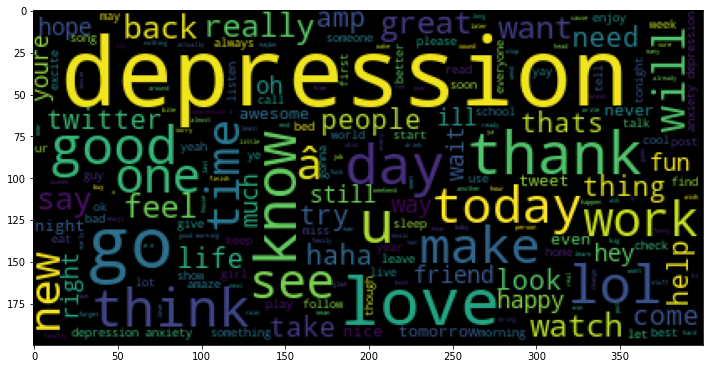

In [100]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(joined_sentences));

In [101]:
f_df['Labels'].value_counts()

0    8000
1    2314
Name: Labels, dtype: int64

In [102]:
positive_tweets = f_df[f_df['Labels'] == 0]
positive_sentences = positive_tweets['Tweets'].tolist()
positive_string = " ".join(positive_sentences)

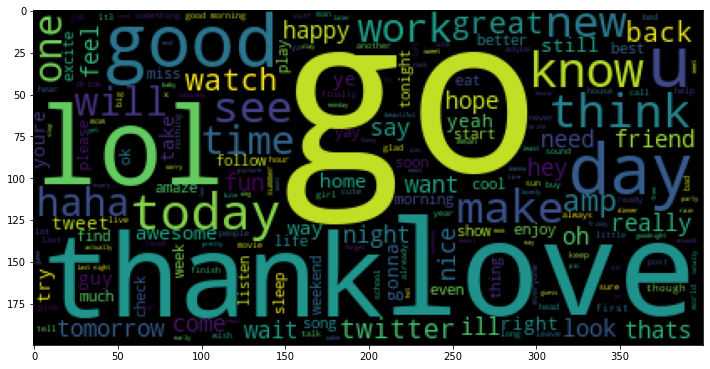

In [103]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(positive_string));

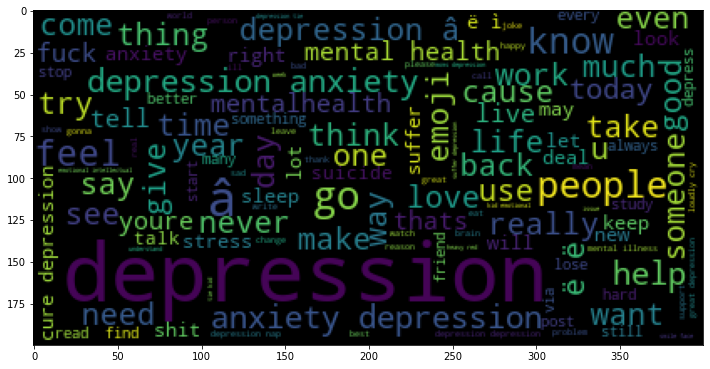

In [104]:
# Let's visualize negative tweets

negative_tweets = f_df[f_df['Labels'] == 1]
negative_sentences = negative_tweets['Tweets'].tolist()
negative_string = " ".join(negative_sentences)

plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(negative_string));

# Sentiment Analysis 

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [106]:
cv = TfidfVectorizer()

In [107]:
tfidf = cv.fit_transform(f_df['Tweets'])

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tfidf, f_df['Labels'], test_size = 0.2)

In [110]:
tfX_train

<8251x15359 sparse matrix of type '<class 'numpy.float64'>'
	with 66130 stored elements in Compressed Sparse Row format>

In [111]:
## NaiveBayes

from sklearn.naive_bayes import MultinomialNB

In [112]:
mn = MultinomialNB()

In [113]:
mn.fit(tfX_train, tfy_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_mn = mn.predict(tfX_test)

print(f'Accuracy score is : {accuracy_score(tfy_test, y_pred_mn)}')

Accuracy score is : 0.9108095007270964


In [115]:
cf = confusion_matrix(tfy_test, y_pred_mn, labels = [1,0])
cf

array([[ 275,  184],
       [   0, 1604]], dtype=int64)

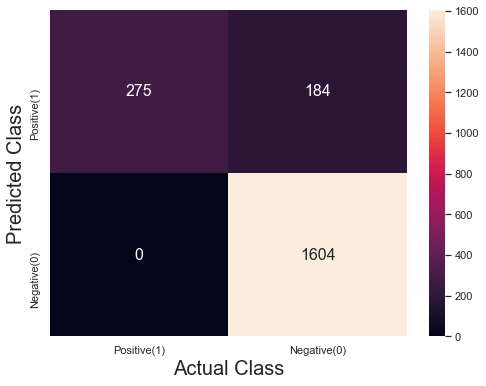

In [116]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()